In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import pickle
import joblib

# Inline plotting (only if using Jupyter)
%matplotlib inline  


**Load The DataSet**

In [3]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Checking the null Values**

In [5]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


**Fill missing values with column mean**

In [7]:
df.fillna(df.mean(), inplace=True)

**Plotting**

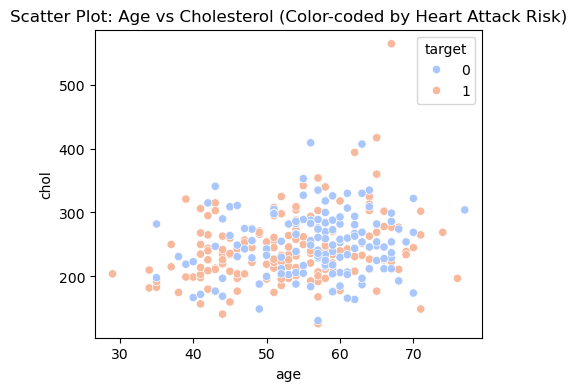

In [9]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x='age', y='chol', data=df, hue='target', palette='coolwarm')
plt.title('Scatter Plot: Age vs Cholesterol (Color-coded by Heart Attack Risk)')
plt.show()


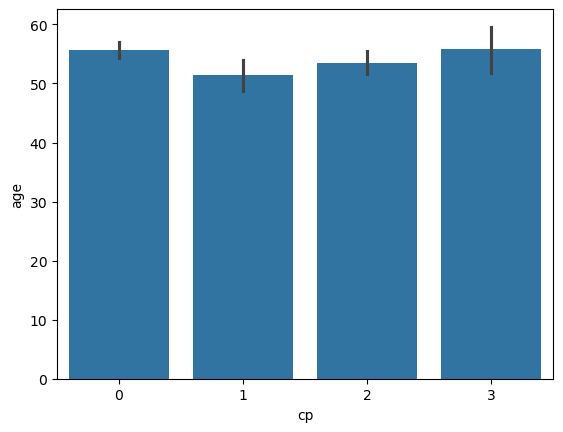

In [10]:
sns.barplot(x='cp', y='age', data=df)
plt.show()

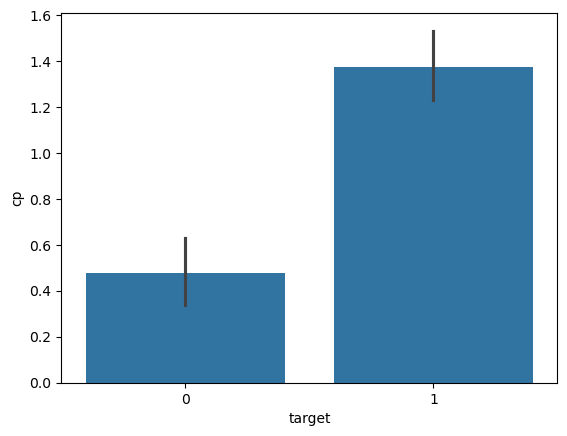

In [11]:
sns.barplot(x='target', y='cp', data=df)
plt.show()

***Exploratory Data Analaysis***

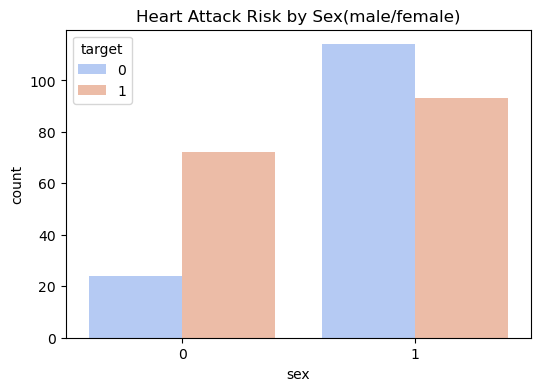

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='target', data=df, palette='coolwarm')
plt.title('Heart Attack Risk by Sex(male/female)')
plt.show()


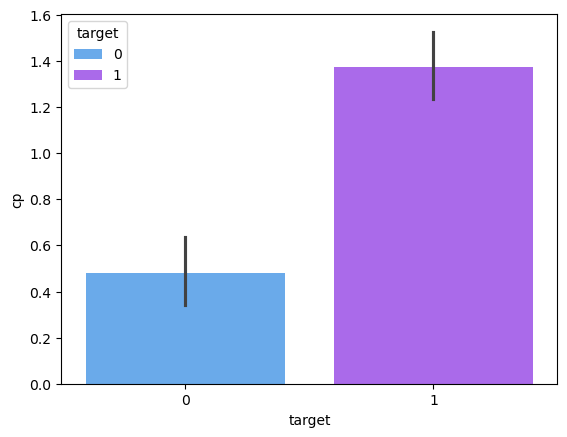

In [14]:
sns.barplot(x='target', y='cp', data= df ,  hue='target',palette='cool')
plt.show()

**Split data into features (X) and target (y)**

In [16]:
x = df.drop(['target'],axis =1)
y = df['target']

**Split the data into training and testing sets**

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

**Scale the features**

In [20]:
sc =StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

***Creating models
Logistic Regression***

In [22]:
lr = LogisticRegression()

In [23]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [24]:
print("Logistic Regression Accuracy:", lr.score(xtest, ytest))

Logistic Regression Accuracy: 0.8852459016393442


**Confusion Matrix**

In [26]:
yp = lr.predict(xtest)

In [27]:
c = confusion_matrix(ytest,yp)


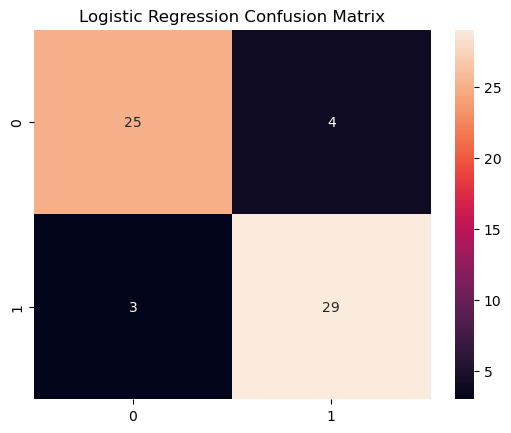

In [28]:
sns.heatmap(c, annot=True, fmt="d")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

**Support Vector Classifier(SVC)**

In [30]:
sv = SVC()

In [31]:
sv.fit(xtrain,ytrain)

SVC()

In [32]:
print("SVC Accuracy:", sv.score(xtest, ytest))

SVC Accuracy: 0.8688524590163934


**Randmon Forest Classifier**

In [34]:
rfc = RandomForestClassifier(n_estimators=200)

In [35]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [36]:
print("Random Forest Accuracy:", rfc.score(xtest, ytest))

Random Forest Accuracy: 0.8524590163934426


**Cross-validation for Random Forest**

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
rfm = cross_val_score(rfc,X=xtrain , y=ytrain , cv = 10)

In [40]:
print("Random Forest CV Score:", rfm.mean())

Random Forest CV Score: 0.8140000000000001


**K Nearest Neighbor**

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
kn = KNeighborsClassifier(n_neighbors = 7)

In [44]:
kn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=7)

In [45]:
print("KNN Accuracy:", kn.score(xtest, ytest))

KNN Accuracy: 0.8688524590163934


In [46]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


**Predicting a value**

In [88]:
# Input data for prediction (only the feature columns, no target)
input_data = [[52, 1, 2, 130, 250, 0, 1, 150, 0, 1.0, 2, 0, 2]]  # 13 features

# Create a DataFrame from the input (with the same column names as the training features)
input_df = pd.DataFrame(input_data, columns=df.columns[:-1])  # Exclude the target column

# Scale the input data using the same scaler used during training
input_scaled = sc.transform(input_df)

# Make a prediction
prediction = kn.predict(input_scaled)

# Output the result based on the prediction
if prediction[0] == 1:
    print("Prediction: The person is at risk of heart attack.")
else:
    print("Prediction: The person is not at risk of heart attack.")


Prediction: The person is at risk of heart attack.


**# Save the trained model to a file**

In [91]:
joblib.dump(kn, 'heart_attack_model.pkl')

if __name__ == "__main__":
    KNeighborsClassifier()

In [93]:
print("✅ Model saved as heart_attack_model.pkl")

✅ Model saved as heart_attack_model.pkl
